#Import Gdrive

In [585]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import libraries

In [586]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

#Import data

In [587]:
data=pd.read_excel('/content/drive/MyDrive/Waku/HC /HC Shopee.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [588]:
data.head()

,Market Place,Order ID,Payment Date,Nama Produk,Jumlah Pesanan,Harga Produk,Total Diskon,Diskon Penjual,Diskon Market place,Pengiriman,Total Shipping Fee (Rp.),Total Pembayaran,Kurir,Kota/Kabupaten,Provinsi
0,Shopee,201124T0M4UFW3,2020-11-24 12:14:00,Chillic Dory,1,56000,0,0,0,YES,18000,74000,JNE,KOTA BEKASI,JAWA BARAT
1,Shopee,201124T0M4UFW3,2020-11-24 12:14:00,Pop Chicken Crumbs,1,48000,0,0,0,YES,18000,66000,JNE,KOTA BEKASI,JAWA BARAT
2,Shopee,201124TTJTU8A4,2020-11-24 19:59:00,Chillic Dory,3,56000,0,0,0,YES,18000,186000,JNE,KAB. BOGOR,JAWA BARAT
3,Shopee,201124TTJTU8A4,2020-11-24 19:59:00,Pop Chicken Crumbs,1,48000,0,0,0,YES,18000,66000,JNE,KAB. BOGOR,JAWA BARAT
4,Shopee,2011250GGGU42X,2020-11-25 22:35:00,Pop Chicken Crumbs,3,48000,14000,14000,0,Sameday,15000,159000,GrabExpress,KOTA JAKARTA UTARA,DKI JAKARTA


In [589]:
data1=pd.read_excel('/content/drive/MyDrive/Waku/HC /HC_Tokped.xlsx')

In [590]:
data2=pd.read_excel('/content/drive/MyDrive/Waku/HC /MASTER HAPPYCHEEKS.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#Data Shoppee explore


In [591]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Market Place              2553 non-null   object
 1   Order ID                  2553 non-null   object
 2   Payment Date              2553 non-null   object
 3   Nama Produk               2553 non-null   object
 4   Jumlah Pesanan            2553 non-null   int64 
 5   Harga Produk              2553 non-null   int64 
 6   Total Diskon              2553 non-null   int64 
 7   Diskon Penjual            2553 non-null   int64 
 8   Diskon Market place       2553 non-null   int64 
 9   Pengiriman                2553 non-null   object
 10  Total Shipping Fee (Rp.)  2553 non-null   int64 
 11  Total Pembayaran          2553 non-null   int64 
 12  Kurir                     2553 non-null   object
 13  Kota/Kabupaten            2553 non-null   object
 14  Provinsi                

In [592]:
data.columns.tolist()

['Market Place',
 'Order ID',
 'Payment Date',
 'Nama Produk',
 'Jumlah Pesanan',
 'Harga Produk',
 'Total Diskon',
 'Diskon Penjual',
 'Diskon Market place',
 'Pengiriman',
 'Total Shipping Fee (Rp.)',
 'Total Pembayaran',
 'Kurir',
 'Kota/Kabupaten',
 'Provinsi']

In [593]:
data=data.drop(['Order ID',
 'Harga Produk',
 'Total Diskon',
 'Diskon Market place',
 'Pengiriman',
 'Kurir','Diskon Penjual'],axis=1)

In [594]:
data.head()

,Market Place,Payment Date,Nama Produk,Jumlah Pesanan,Total Shipping Fee (Rp.),Total Pembayaran,Kota/Kabupaten,Provinsi
0,Shopee,2020-11-24 12:14:00,Chillic Dory,1,18000,74000,KOTA BEKASI,JAWA BARAT
1,Shopee,2020-11-24 12:14:00,Pop Chicken Crumbs,1,18000,66000,KOTA BEKASI,JAWA BARAT
2,Shopee,2020-11-24 19:59:00,Chillic Dory,3,18000,186000,KAB. BOGOR,JAWA BARAT
3,Shopee,2020-11-24 19:59:00,Pop Chicken Crumbs,1,18000,66000,KAB. BOGOR,JAWA BARAT
4,Shopee,2020-11-25 22:35:00,Pop Chicken Crumbs,3,15000,159000,KOTA JAKARTA UTARA,DKI JAKARTA


In [595]:
data=data.rename(columns={"Diskon Penjual":"Diskon Dari Penjual","Product Name":"Nama Produk","Jumlah Pesanan":"Jumlah","Order ID":"No. Pesanan","Order Status":"Status Pesanan","Recipient Address":"Alamat Pengiriman","Courier":"Opsi Pengiriman","Total Shipping Fee (Rp.)": 'Perkiraan Ongkos Kirim','Payment Date':'Waktu Pembayaran Dilakukan','Harga Awal (Rp.)':'Harga Awal','Harga Jual (Rp.)':'Total Harga Produk','Discount Amount (Rp.)': 'Total Diskon','Total Shipping Fee (Rp.)':'Perkiraan Ongkos Kirim','Total Amount (Rp.)':'Total Pembayaran'})

#Data Tokopedia

In [596]:
data1=data1.rename(columns={"Subsidi Amount (Rp.)":"Diskon Dari Penjual","Product Name":"Nama Produk","Quantity":"Jumlah","Order ID":"No. Pesanan","Order Status":"Status Pesanan","Recipient Address":"Alamat Pengiriman","Courier":"Opsi Pengiriman","Total Shipping Fee (Rp.)": 'Perkiraan Ongkos Kirim','Payment Date':'Waktu Pembayaran Dilakukan','Harga Awal (Rp.)':'Harga Awal','Harga Jual (Rp.)':'Total Harga Produk','Discount Amount (Rp.)': 'Total Diskon','Total Shipping Fee (Rp.)':'Perkiraan Ongkos Kirim','Total Amount (Rp.)':'Total Pembayaran'})

In [597]:
data1.head()

,Market Place,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Price (Rp.),Total Diskon,Diskon Dari Penjual,Harga Jual,Nilai Voucher,Alamat Pengiriman,Opsi Pengiriman,Shipping Price + fee (Rp.),Insurance (Rp.),Perkiraan Ongkos Kirim,Total Pembayaran,Jenis Layanan,Kota/Kabupaten,Provinsi
0,Tokopedia,878924542.0,02-08-2021 09:44:51,Chillic Dory,2,56000,0,0,NaN,NaN,Komplek Perumahan (Cluster) Mutiara Taman Pale...,GoSend,21000,600,21600,133600,Instant,KOTA JAKARTA BARAT,DKI JAKARTA
1,Tokopedia,879993705.0,03-08-2021 07:17:54,Chillic Dory,2,56000,0,0,NaN,NaN,JL. Buni No.21 RT 006 RW 03 Mangga Besar\nTama...,GoSend,15000,800,15800,175800,Sameday,KOTA JAKARTA BARAT,DKI JAKARTA
2,Tokopedia,879993705.0,03-08-2021 07:17:54,Pop Chicken Crumbs,1,48000,0,0,NaN,NaN,JL. Buni No.21 RT 006 RW 03 Mangga Besar\nTama...,GoSend,15000,800,15800,175800,Sameday,KOTA JAKARTA BARAT,DKI JAKARTA
3,Tokopedia,882029919.0,04-08-2021 18:44:46,Chicken Rougan - Singapore,2,55000,0,0,NaN,NaN,bsd city the icon verdant view blok i 3 nmr 15...,JNE,9000,500,9500,119500,Reguler,KOTA JAKARTA BARAT,BANTEN
4,Tokopedia,884173618.0,06-08-2021 12:27:30,Chicken Rougan - Singapore,1,55000,0,0,NaN,NaN,"Jl. Gading Nirwana 4 Blok PF12 no 9, Kelapa Ga...",JNE,18000,900,18900,209900,YES,KOTA JAKARTA UTARA,DKI JAKARTA


In [598]:
data1.columns.tolist()

['Market Place',
 'No. Pesanan',
 'Waktu Pembayaran Dilakukan',
 'Nama Produk',
 'Jumlah',
 'Price (Rp.)',
 'Total Diskon',
 'Diskon Dari Penjual',
 'Harga Jual',
 'Nilai Voucher',
 'Alamat Pengiriman',
 'Opsi Pengiriman',
 'Shipping Price + fee (Rp.)',
 'Insurance (Rp.)',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Jenis Layanan',
 'Kota/Kabupaten',
 'Provinsi']

In [599]:
data1=data1.drop([
 'Price (Rp.)',
 'No. Pesanan',
 'Total Diskon',
 'Diskon Dari Penjual',
 'Harga Jual',
 'Nilai Voucher',
 'Opsi Pengiriman',
 'Shipping Price + fee (Rp.)',
 'Insurance (Rp.)',
 'Jenis Layanan',
 'Alamat Pengiriman','Diskon Dari Penjual'],axis=1)

In [600]:
data1

,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi
0,Tokopedia,02-08-2021 09:44:51,Chillic Dory,2,21600,133600,KOTA JAKARTA BARAT,DKI JAKARTA
1,Tokopedia,03-08-2021 07:17:54,Chillic Dory,2,15800,175800,KOTA JAKARTA BARAT,DKI JAKARTA
2,Tokopedia,03-08-2021 07:17:54,Pop Chicken Crumbs,1,15800,175800,KOTA JAKARTA BARAT,DKI JAKARTA
3,Tokopedia,04-08-2021 18:44:46,Chicken Rougan - Singapore,2,9500,119500,KOTA JAKARTA BARAT,BANTEN
4,Tokopedia,06-08-2021 12:27:30,Chicken Rougan - Singapore,1,18900,209900,KOTA JAKARTA UTARA,DKI JAKARTA
...,...,...,...,...,...,...,...,...
558,Tokopedia,03-02-2023 12:36:14,Bistique Van Java,1,0,180180,CENGKARENG,JAKARTA BARAT
559,Tokopedia,03-02-2023 12:36:14,Crunchy Floss 100gr / abon sapi halal premium ...,1,0,180180,CENGKARENG,JAKARTA BARAT
560,Tokopedia,03-02-2023 12:36:14,Singapore Chicken Rougan 170gr dendeng ayam ma...,1,0,180180,CENGKARENG,JAKARTA BARAT
561,Tokopedia,03-02-2023 15:26:43,Singapore Chicken Rougan 170gr dendeng ayam ma...,1,0,136890,KOTA JAKARTA BARAT,BANTEN


In [601]:
data1['Market Place']='Tokopedia'

In [602]:
datagabungan=pd.concat([data,data1],axis=0)

In [603]:
datagabungan.head()

,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi
0,Shopee,2020-11-24 12:14:00,Chillic Dory,1,18000,74000,KOTA BEKASI,JAWA BARAT
1,Shopee,2020-11-24 12:14:00,Pop Chicken Crumbs,1,18000,66000,KOTA BEKASI,JAWA BARAT
2,Shopee,2020-11-24 19:59:00,Chillic Dory,3,18000,186000,KAB. BOGOR,JAWA BARAT
3,Shopee,2020-11-24 19:59:00,Pop Chicken Crumbs,1,18000,66000,KAB. BOGOR,JAWA BARAT
4,Shopee,2020-11-25 22:35:00,Pop Chicken Crumbs,3,15000,159000,KOTA JAKARTA UTARA,DKI JAKARTA


In [604]:
datagabungan.columns.tolist()

['Market Place',
 'Waktu Pembayaran Dilakukan',
 'Nama Produk',
 'Jumlah',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Kota/Kabupaten',
 'Provinsi']

In [605]:
datagabungan

,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi
0,Shopee,2020-11-24 12:14:00,Chillic Dory,1,18000,74000,KOTA BEKASI,JAWA BARAT
1,Shopee,2020-11-24 12:14:00,Pop Chicken Crumbs,1,18000,66000,KOTA BEKASI,JAWA BARAT
2,Shopee,2020-11-24 19:59:00,Chillic Dory,3,18000,186000,KAB. BOGOR,JAWA BARAT
3,Shopee,2020-11-24 19:59:00,Pop Chicken Crumbs,1,18000,66000,KAB. BOGOR,JAWA BARAT
4,Shopee,2020-11-25 22:35:00,Pop Chicken Crumbs,3,15000,159000,KOTA JAKARTA UTARA,DKI JAKARTA
...,...,...,...,...,...,...,...,...
558,Tokopedia,03-02-2023 12:36:14,Bistique Van Java,1,0,180180,CENGKARENG,JAKARTA BARAT
559,Tokopedia,03-02-2023 12:36:14,Crunchy Floss 100gr / abon sapi halal premium ...,1,0,180180,CENGKARENG,JAKARTA BARAT
560,Tokopedia,03-02-2023 12:36:14,Singapore Chicken Rougan 170gr dendeng ayam ma...,1,0,180180,CENGKARENG,JAKARTA BARAT
561,Tokopedia,03-02-2023 15:26:43,Singapore Chicken Rougan 170gr dendeng ayam ma...,1,0,136890,KOTA JAKARTA BARAT,BANTEN


In [606]:
datagabungan.isnull().sum()

Market Place                  0
Waktu Pembayaran Dilakukan    0
Nama Produk                   0
Jumlah                        0
Perkiraan Ongkos Kirim        0
Total Pembayaran              0
Kota/Kabupaten                0
Provinsi                      0
dtype: int64

In [607]:
datagabungan=datagabungan.dropna(subset=['Waktu Pembayaran Dilakukan','Jumlah','Perkiraan Ongkos Kirim','Total Pembayaran'],axis=0, how="any").reset_index()

In [608]:
datagabungan['Perkiraan Ongkos Kirim']

0       18000
1       18000
2       18000
3       18000
4       15000
        ...  
3111        0
3112        0
3113        0
3114        0
3115        0
Name: Perkiraan Ongkos Kirim, Length: 3116, dtype: int64

#Mengganti data types

In [609]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('Rp', '').replace('.', ''))
    return(x)

In [610]:
#mengganti data types group
datagabungan['Perkiraan Ongkos Kirim'] = datagabungan['Perkiraan Ongkos Kirim'].apply(clean_currency).astype('float')
datagabungan['Total Pembayaran'] = datagabungan['Total Pembayaran'].apply(clean_currency).astype('float')
datagabungan['Nama Produk'] = datagabungan['Nama Produk'].astype(str)
datagabungan['Waktu Pembayaran Dilakukan'] = pd.to_datetime(datagabungan['Waktu Pembayaran Dilakukan'], errors='coerce')
datagabungan['Perkiraan Ongkos Kirim'] = datagabungan['Perkiraan Ongkos Kirim'].astype(int)
datagabungan['Total Pembayaran'] = datagabungan['Total Pembayaran'].astype(int)
datagabungan['Market Place'] = datagabungan['Market Place'].astype(str)
datagabungan['Kota/Kabupaten'] = datagabungan['Kota/Kabupaten'].astype(str)

In [611]:
datagabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116 entries, 0 to 3115
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       3116 non-null   int64         
 1   Market Place                3116 non-null   object        
 2   Waktu Pembayaran Dilakukan  3096 non-null   datetime64[ns]
 3   Nama Produk                 3116 non-null   object        
 4   Jumlah                      3116 non-null   int64         
 5   Perkiraan Ongkos Kirim      3116 non-null   int64         
 6   Total Pembayaran            3116 non-null   int64         
 7   Kota/Kabupaten              3116 non-null   object        
 8   Provinsi                    3116 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 219.2+ KB


In [612]:
datagabungan['Dates'] = pd.to_datetime(datagabungan['Waktu Pembayaran Dilakukan'], format='%M').dt.date
datagabungan['Hours'] = pd.to_datetime(datagabungan['Waktu Pembayaran Dilakukan'], format='%Y:%M:%D').dt.time

In [613]:
datagabungan['Dates']= pd.to_datetime(datagabungan['Dates'], errors='coerce')
datagabungan['Hours']= pd.to_datetime(datagabungan['Hours'], errors='coerce')

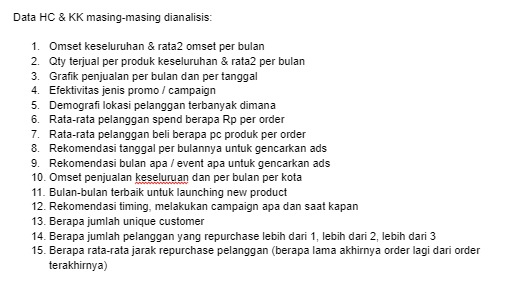

In [614]:
def cek_pembayaran_ongkir (pembayaran):
  
  digit = float (pembayaran)
  # print (digit)
  if digit <= 100:
    clean_pembayaran = digit * 1000
    return clean_pembayaran
    # print (pembayaran)
  else :
    return digit
    # print (pembayaran)

In [615]:
def cek_pembayaran (omset):
  
  digit = float (omset)
  # print (digit)
  if digit <= 1000:
    clean_pembayaran = digit * 1000
    return clean_pembayaran
    # print (pembayaran)
  else :
    return digit
    # print (pembayaran)

In [616]:
datagabungan['Perkiraan Ongkos Kirim'] = datagabungan['Perkiraan Ongkos Kirim'].apply(lambda x: cek_pembayaran_ongkir(x))
datagabungan['Total Pembayaran'] = datagabungan['Total Pembayaran'].apply(lambda x: cek_pembayaran(x))

## Shoppee

In [617]:
Data1=datagabungan[['Market Place','Total Pembayaran','Jumlah','Perkiraan Ongkos Kirim']]

In [618]:
Data1

,Market Place,Total Pembayaran,Jumlah,Perkiraan Ongkos Kirim
0,Shopee,74000.0,1,18000.0
1,Shopee,66000.0,1,18000.0
2,Shopee,186000.0,3,18000.0
3,Shopee,66000.0,1,18000.0
4,Shopee,159000.0,3,15000.0
...,...,...,...,...
3111,Tokopedia,180180.0,1,0.0
3112,Tokopedia,180180.0,1,0.0
3113,Tokopedia,180180.0,1,0.0
3114,Tokopedia,136890.0,1,0.0


In [619]:
Data_Shopee=Data1[(Data1['Market Place']=='Shopee')]

In [620]:
Data_Shopee['Omset']=Data_Shopee['Total Pembayaran']-Data_Shopee['Perkiraan Ongkos Kirim']

<ipython-input-620-257dda4e3a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Shopee['Omset']=Data_Shopee['Total Pembayaran']-Data_Shopee['Perkiraan Ongkos Kirim']


In [621]:
Data_Shopee['Omset'].sum()

319246980.0

In [622]:
Data_Shopee['Jumlah'].sum()

12445

## Tokopedia

In [623]:
Data_Tokopedia=Data1[(Data1['Market Place']=='Tokopedia')]

In [624]:
Data_Tokopedia['Omset']=Data_Tokopedia['Total Pembayaran']-Data_Tokopedia['Perkiraan Ongkos Kirim']

<ipython-input-624-30a70c8cde42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Tokopedia['Omset']=Data_Tokopedia['Total Pembayaran']-Data_Tokopedia['Perkiraan Ongkos Kirim']


In [625]:
Data_Tokopedia['Omset'].sum()

93851990.0

In [626]:
Data_Tokopedia['Jumlah'].sum()

746

# 1. Omset Keseluruhan dan rata2 perbulan

In [627]:
datagabungan.head()

,index,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi,Dates,Hours
0,0,Shopee,2020-11-24 12:14:00,Chillic Dory,1,18000.0,74000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT
1,1,Shopee,2020-11-24 12:14:00,Pop Chicken Crumbs,1,18000.0,66000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT
2,2,Shopee,2020-11-24 19:59:00,Chillic Dory,3,18000.0,186000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT
3,3,Shopee,2020-11-24 19:59:00,Pop Chicken Crumbs,1,18000.0,66000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT
4,4,Shopee,2020-11-25 22:35:00,Pop Chicken Crumbs,3,15000.0,159000.0,KOTA JAKARTA UTARA,DKI JAKARTA,2020-11-25,NaT


In [628]:
datagabungan['Dates']

0      2020-11-24
1      2020-11-24
2      2020-11-24
3      2020-11-24
4      2020-11-25
          ...    
3111   2023-03-02
3112   2023-03-02
3113   2023-03-02
3114   2023-03-02
3115   2023-03-02
Name: Dates, Length: 3116, dtype: datetime64[ns]

In [629]:
datagabungan['year'] = pd.DatetimeIndex(datagabungan['Dates']).year
datagabungan['month'] = pd.DatetimeIndex(datagabungan['Dates']).month
datagabungan['day'] = pd.DatetimeIndex(datagabungan['Dates']).day

In [630]:
datagabungan['Omset Keseluruhan'] = datagabungan['Total Pembayaran']-datagabungan['Perkiraan Ongkos Kirim']

## Data 2020

In [631]:
data2020=pd.DataFrame(datagabungan[datagabungan['year']==2020.0])

In [632]:
data2020['Omset Keseluruhan'] = data2020['Total Pembayaran']-data2020['Perkiraan Ongkos Kirim']

In [633]:
#Omset Keseluruhan
data2020['Omset Keseluruhan'].sum()

40283500.0

In [634]:
#Rata-rata Omset Perbulan
40283500/3

13427833.333333334

##Data 2021

In [635]:
data2021=pd.DataFrame(datagabungan[datagabungan['year']==2021.0])

In [636]:
data2021['Omset Keseluruhan'] = data2021['Total Pembayaran']-data2021['Perkiraan Ongkos Kirim']

In [637]:
#Omset Keseluruhan
data2021['Omset Keseluruhan'].sum()

330222530.0

In [638]:
#Rata-rata Omset Perbulan
284202144/12

23683512.0

## Data 2022

In [639]:
data2022=pd.DataFrame(datagabungan[datagabungan['year']==2022.0])

In [640]:
data2022['Omset Keseluruhan'] = data2022['Total Pembayaran']-data2022['Perkiraan Ongkos Kirim']

In [641]:
#Omset Keseluruhan
data2022['Omset Keseluruhan'].sum()

35390360.0

In [642]:
#Rata-rata Omset Perbulan
40276283/12

3356356.9166666665

## Data 2023

In [643]:
data2023=pd.DataFrame(datagabungan[datagabungan['year']==2023.0])

In [644]:
data2023['Omset Keseluruhan'] = data2023['Total Pembayaran']-data2023['Perkiraan Ongkos Kirim']

In [645]:
#Omset Keseluruhan
data2023['Omset Keseluruhan'].sum()

5959080.0

In [646]:
#Rata-rata Omset Perbulan
5763000/2

2881500.0

# 2. Quantity terjual per produk keseluruhan dan rata-rata perbulan

##Data 2020

In [647]:
#Omset Keseluruhan
data2020['Jumlah'].sum()

467

In [648]:
#Rata-rata Omset Perbulan
467/3

155.66666666666666

##Data 2023

In [649]:
#Omset Keseluruhan
data2023['Jumlah'].sum()

98

In [650]:
86/2

43.0

##Data 2022

In [651]:
#Omset Keseluruhan
data2022['Jumlah'].sum()

655

In [652]:
#bulanan
655/12

54.583333333333336

## Data 2021

In [653]:
#Omset Keseluruhan
data2021['Jumlah'].sum()

11945

In [654]:
#bulanan
11945/12

995.4166666666666

# 3. Grafik penjualan perbulan dan pertanggal

In [655]:
datagabungan.head()

,index,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi,Dates,Hours,year,month,day,Omset Keseluruhan
0,0,Shopee,2020-11-24 12:14:00,Chillic Dory,1,18000.0,74000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,56000.0
1,1,Shopee,2020-11-24 12:14:00,Pop Chicken Crumbs,1,18000.0,66000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,48000.0
2,2,Shopee,2020-11-24 19:59:00,Chillic Dory,3,18000.0,186000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,168000.0
3,3,Shopee,2020-11-24 19:59:00,Pop Chicken Crumbs,1,18000.0,66000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,48000.0
4,4,Shopee,2020-11-25 22:35:00,Pop Chicken Crumbs,3,15000.0,159000.0,KOTA JAKARTA UTARA,DKI JAKARTA,2020-11-25,NaT,2020.0,11.0,25.0,144000.0


### Grafik total penjualan perbulan dan quantity

In [656]:
datagabungan.groupby('month').count()

,index,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi,Dates,Hours,year,day,Omset Keseluruhan
month,,,,,,,,,,,,,,
1.0,334,334,334,334,334,334,334,334,334,334,0,334,334,334
2.0,276,276,276,276,276,276,276,276,276,276,0,276,276,276
3.0,321,321,321,321,321,321,321,321,321,321,0,321,321,321
4.0,274,274,274,274,274,274,274,274,274,274,0,274,274,274
5.0,215,215,215,215,215,215,215,215,215,215,0,215,215,215
6.0,266,266,266,266,266,266,266,266,266,266,0,266,266,266
7.0,356,356,356,356,356,356,356,356,356,356,0,356,356,356
8.0,269,269,269,269,269,269,269,269,269,269,0,269,269,269
9.0,263,263,263,263,263,263,263,263,263,263,0,263,263,263


<Axes: xlabel='month'>

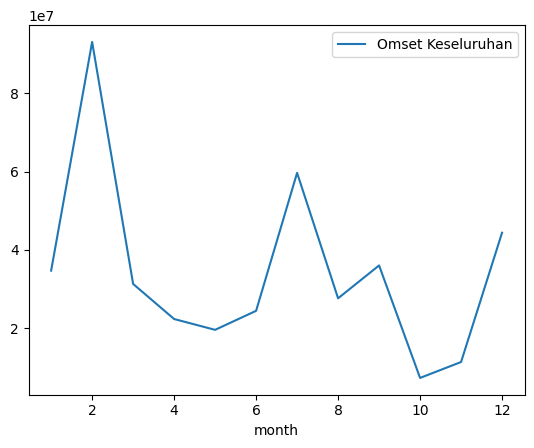

In [657]:
datagabungan.groupby(datagabungan.month)['Omset Keseluruhan'].sum().plot(legend=True)

In [658]:
datagabungan.groupby(datagabungan.month)['Jumlah'].sum()

month
1.0      488
2.0     2802
3.0      849
4.0      351
5.0      290
6.0      365
7.0     5561
8.0      347
9.0     1344
10.0      93
11.0     158
12.0     517
Name: Jumlah, dtype: int64

<Axes: xlabel='month'>

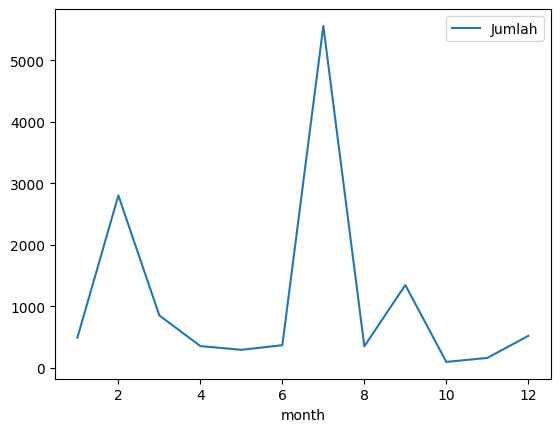

In [659]:
datagabungan.groupby(datagabungan.month)['Jumlah'].sum().plot(legend=True)

### Grafik total penjualan pertanggal dan quantity

In [660]:
datagabungan.groupby('day').count()

,index,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi,Dates,Hours,year,month,Omset Keseluruhan
day,,,,,,,,,,,,,,
1.0,89,89,89,89,89,89,89,89,89,89,0,89,89,89
2.0,117,117,117,117,117,117,117,117,117,117,0,117,117,117
3.0,96,96,96,96,96,96,96,96,96,96,0,96,96,96
4.0,91,91,91,91,91,91,91,91,91,91,0,91,91,91
5.0,109,109,109,109,109,109,109,109,109,109,0,109,109,109
6.0,90,90,90,90,90,90,90,90,90,90,0,90,90,90
7.0,112,112,112,112,112,112,112,112,112,112,0,112,112,112
8.0,85,85,85,85,85,85,85,85,85,85,0,85,85,85
9.0,174,174,174,174,174,174,174,174,174,174,0,174,174,174


<Axes: xlabel='day'>

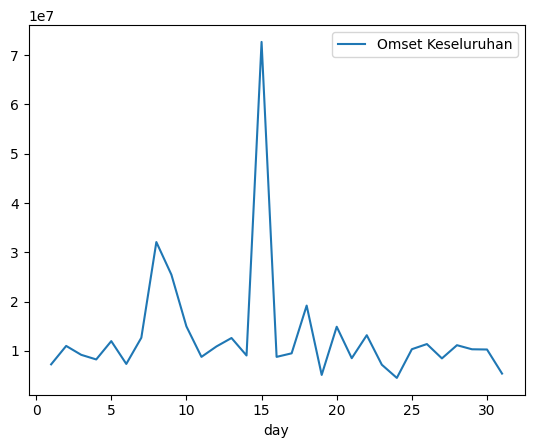

In [661]:
datagabungan.groupby(datagabungan.day)['Omset Keseluruhan'].sum().plot(legend=True)

In [662]:
datagabungan.groupby(datagabungan.day)['Jumlah'].sum()

day
1.0      131
2.0      175
3.0      154
4.0      141
5.0      148
6.0      118
7.0      157
8.0     5102
9.0      224
10.0     201
11.0     146
12.0     181
13.0     123
14.0     126
15.0    1598
16.0     117
17.0     100
18.0    1113
19.0      80
20.0    1160
21.0     131
22.0     351
23.0     129
24.0      91
25.0     157
26.0     143
27.0     143
28.0     179
29.0     132
30.0     151
31.0     263
Name: Jumlah, dtype: int64

<Axes: xlabel='day'>

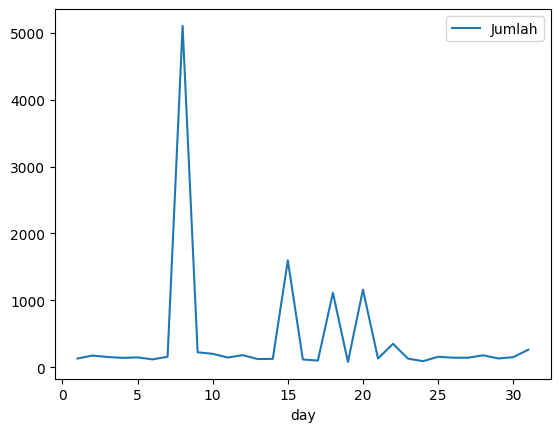

In [663]:
datagabungan.groupby(datagabungan.day)['Jumlah'].sum().plot(legend=True)

<Axes: xlabel='day'>

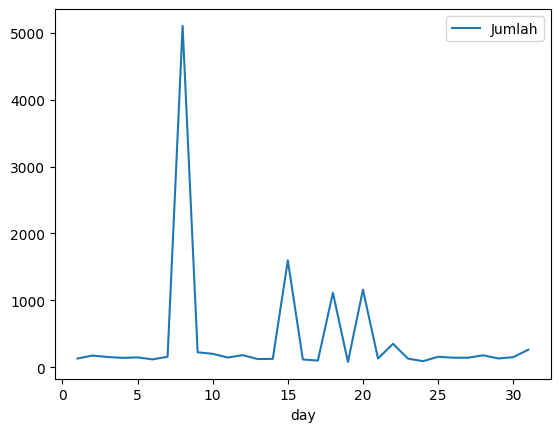

In [664]:
datagabungan.groupby(datagabungan.day)['Jumlah'].sum().plot(legend=True)

In [665]:
datagabungan['month_year'] = pd.to_datetime(datagabungan['Dates']).dt.to_period('D')
datagabungan.head()

,index,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi,Dates,Hours,year,month,day,Omset Keseluruhan,month_year
0,0,Shopee,2020-11-24 12:14:00,Chillic Dory,1,18000.0,74000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,56000.0,2020-11-24
1,1,Shopee,2020-11-24 12:14:00,Pop Chicken Crumbs,1,18000.0,66000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,48000.0,2020-11-24
2,2,Shopee,2020-11-24 19:59:00,Chillic Dory,3,18000.0,186000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,168000.0,2020-11-24
3,3,Shopee,2020-11-24 19:59:00,Pop Chicken Crumbs,1,18000.0,66000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,48000.0,2020-11-24
4,4,Shopee,2020-11-25 22:35:00,Pop Chicken Crumbs,3,15000.0,159000.0,KOTA JAKARTA UTARA,DKI JAKARTA,2020-11-25,NaT,2020.0,11.0,25.0,144000.0,2020-11-25


In [666]:
grouped=datagabungan.groupby([datagabungan.month, datagabungan.day])['Omset Keseluruhan'].sum()

In [667]:
grouped.sort_values()

month  day 
9.0    21.0       33000.0
8.0    20.0       33000.0
10.0   11.0       37000.0
       2.0        55000.0
9.0    6.0        55000.0
                  ...    
12.0   12.0     6201700.0
9.0    20.0     6376000.0
2.0    18.0    10861000.0
7.0    8.0     25468500.0
2.0    15.0    57348000.0
Name: Omset Keseluruhan, Length: 329, dtype: float64

<Axes: xlabel='month,day'>

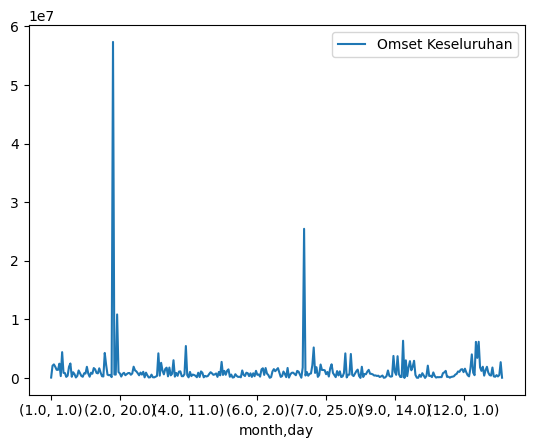

In [668]:
datagabungan.groupby([datagabungan.month, datagabungan.day])['Omset Keseluruhan'].sum().plot(legend=True)

In [669]:
grouped1=datagabungan.groupby([datagabungan.month, datagabungan.day])['Jumlah'].sum()

In [670]:
grouped1.sort_values()

month  day 
9.0    6.0        1
1.0    19.0       1
3.0    13.0       1
       17.0       1
10.0   11.0       1
               ... 
3.0    31.0     216
9.0    20.0    1010
2.0    18.0    1012
       15.0    1409
7.0    8.0     5008
Name: Jumlah, Length: 329, dtype: int64

<Axes: xlabel='month,day'>

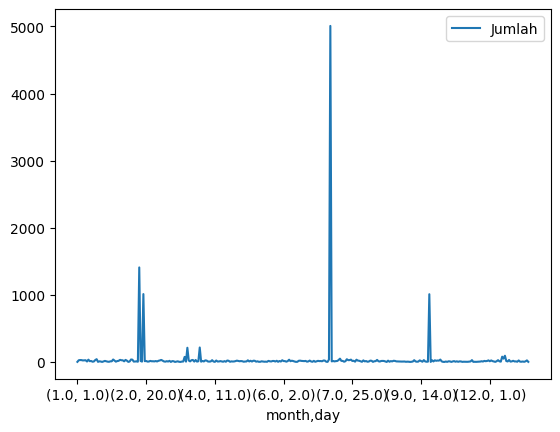

In [671]:
datagabungan.groupby([datagabungan.month, datagabungan.day])['Jumlah'].sum().plot(legend=True)

In [672]:
datagabungan.groupby('Provinsi').agg({'Omset Keseluruhan': ['sum', 'count']})


Omset Keseluruhan      
                                        sum count
Provinsi                                         
BALI                               853500.0    11
BANGKA BELITUNG                   1675000.0    19
BANTEN                           75200045.0   692
BENGKULU                           456000.0     5
DI YOGYAKARTA                      507000.0     8
DKI JAKARTA                     270614090.0  1612
DKI Jakarta                       2139200.0    17
JAKARTA BARAT                     1719100.0    13
JAKARTA PUSAT                      530880.0     4
JAKARTA TIMUR                      540000.0     3
JAKARTA UTARA                      759000.0     4
JAMBI                              770800.0     7
JAWA BARAT                       31630705.0   373
JAWA TENGAH                       4381545.0    63
JAWA TIMUR                       11050605.0   140
KALIMANTAN BARAT                   647000.0    12
KALIMANTAN SELATAN                 153500.0     3
KALIMANTAN TENGAH                  223500.0     5
KALIMANTAN TIMUR                   271000.0     3
KEPULAUAN RIAU                     517500.0    10
LAMPUNG                           1739500.0    22
NUSA TENGGARA BARAT (NTB)           59000.0     1
NUSA TENGGARA TIMUR (NTT)           59000.0     1
RIAU                               652500.0    11
SULAWESI SELATAN                   298000.0     4
SULAWESI TENGAH                   1071500.0    11
SULAWESI UTARA                     675000.0     5
SUMATERA BARAT                      73000.0     1
SUMATERA SELATAN                  1758500.0    25
SUMATERA UTARA                    2073000.0    31

In [673]:
datagabungan.groupby('Kota/Kabupaten').agg({'Omset Keseluruhan': ['sum', 'count']})

Omset Keseluruhan      
                                     sum count
Kota/Kabupaten                                
BEKASI BARAT                     74000.0     1
CAKUNG                          355380.0     3
CENGKARENG                     1625500.0    12
CIBUBUR                         263250.0     3
GAMBIR                          175500.0     1
...                                  ...   ...
KOTA TANGERANG SELATAN        13076795.0   128
KOTA TASIKMALAYA                772545.0     7
KOTA YOGYAKARTA                 238000.0     4
Oesapa Barat                    540000.0     3
TANJUNG PRIOK                   132000.0     1

[104 rows x 2 columns]

#Time Series

In [674]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [675]:
datagabungan.head()

,index,Market Place,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Perkiraan Ongkos Kirim,Total Pembayaran,Kota/Kabupaten,Provinsi,Dates,Hours,year,month,day,Omset Keseluruhan,month_year
0,0,Shopee,2020-11-24 12:14:00,Chillic Dory,1,18000.0,74000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,56000.0,2020-11-24
1,1,Shopee,2020-11-24 12:14:00,Pop Chicken Crumbs,1,18000.0,66000.0,KOTA BEKASI,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,48000.0,2020-11-24
2,2,Shopee,2020-11-24 19:59:00,Chillic Dory,3,18000.0,186000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,168000.0,2020-11-24
3,3,Shopee,2020-11-24 19:59:00,Pop Chicken Crumbs,1,18000.0,66000.0,KAB. BOGOR,JAWA BARAT,2020-11-24,NaT,2020.0,11.0,24.0,48000.0,2020-11-24
4,4,Shopee,2020-11-25 22:35:00,Pop Chicken Crumbs,3,15000.0,159000.0,KOTA JAKARTA UTARA,DKI JAKARTA,2020-11-25,NaT,2020.0,11.0,25.0,144000.0,2020-11-25


In [676]:
datacopy=datagabungan.copy()

In [677]:
datacopy.columns.tolist()

['index',
 'Market Place',
 'Waktu Pembayaran Dilakukan',
 'Nama Produk',
 'Jumlah',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Kota/Kabupaten',
 'Provinsi',
 'Dates',
 'Hours',
 'year',
 'month',
 'day',
 'Omset Keseluruhan',
 'month_year']

## Data Mingguan

In [678]:
dataforcast1=datacopy.drop(columns=['index',
 'Nama Produk',
 'Jumlah',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Market Place',
 'Kota/Kabupaten',
 'Provinsi',
  'Waktu Pembayaran Dilakukan',
 'Hours',
 'year',
 'month',
 'day','month_year'],axis=1)

In [679]:
dataforcast1.head()

,Dates,Omset Keseluruhan
0,2020-11-24,56000.0
1,2020-11-24,48000.0
2,2020-11-24,168000.0
3,2020-11-24,48000.0
4,2020-11-25,144000.0


In [680]:
GB1=dataforcast1.groupby([pd.Grouper(key='Dates', freq='W-MON')]).sum()

In [681]:
dforcast1 = pd.DataFrame(GB1,columns=['Omset Keseluruhan'])

In [682]:
dforcast1.reset_index(drop=False, inplace=True)

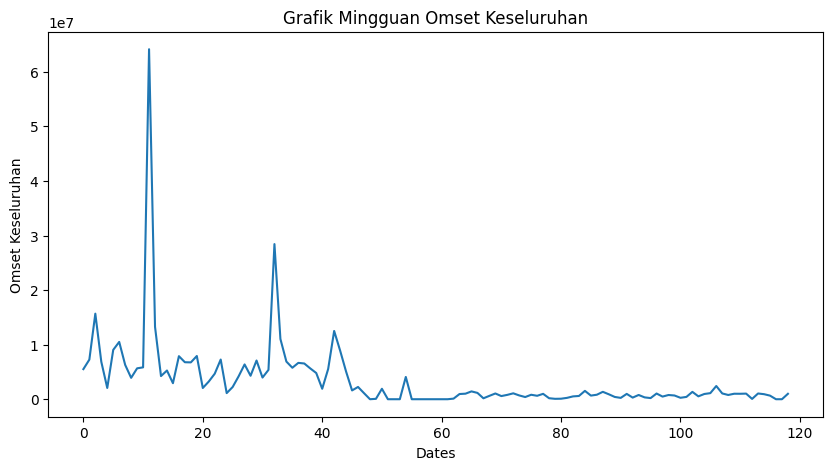

In [683]:
plt.figure(figsize=(10,5))
plt.title('Grafik Mingguan Omset Keseluruhan')
plt.xlabel('Dates')
plt.ylabel('Omset Keseluruhan')
plt.plot(dforcast1['Omset Keseluruhan'])

In [684]:
dforcast1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Dates              119 non-null    datetime64[ns]
 1   Omset Keseluruhan  119 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


# Modeling menggunakan ARIMA

In [ ]:
dforcast1

In [685]:
n = len(dforcast1['Omset Keseluruhan'])
print (n)
train_test_ratio1 =  0.70
dtrain1= dforcast1['Omset Keseluruhan'][:int(n*train_test_ratio1)]
dtest1 = dforcast1['Omset Keseluruhan'][int(n*train_test_ratio1):]

print(f"Train/Test: {len(dtrain1)}/{len(dtest1)}")

119
Train/Test: 83/36


In [686]:
def cek_stationary(sales):
    result = adfuller(sales)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('lags-used: {}'.format(result[2]))
    print('number of Observations: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

cek_stationary(dtrain1)

ADF Statistic: -6.663663184342815
p-value: 4.777090678537989e-09
lags-used: 0
number of Observations: 82
Critical Values:
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085


tidak stationer < 0.05

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


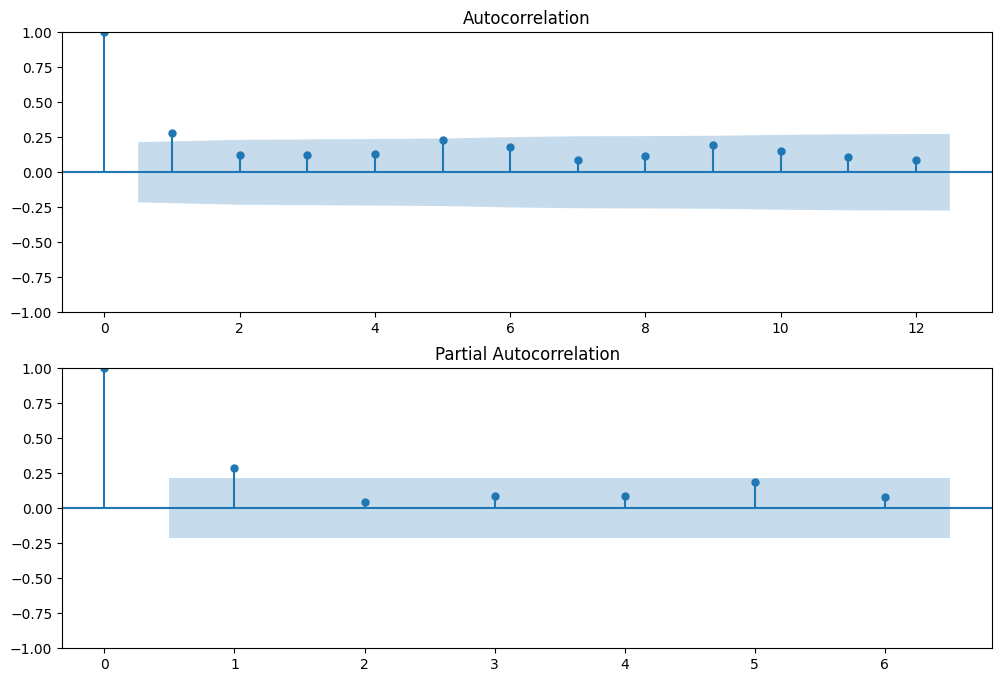

In [687]:
# Menentukan nilai AR (PACF) dan MA (ACF)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtrain1.values,lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtrain1.values,lags=6,ax=ax2)

In [688]:
# ARIMA
!pip install pmdarima > /dev/null
import pmdarima as pm

In [689]:
sarima_model = pm.auto_arima(
    y=dtrain1,                #Data Train
    stationary=False,          #Data tidak statis tetapi ada Trend
    seasonal=False,            # Data untuk periode - Musiman
  #  test='kpss',               # Tes: Kwiatkowski–Phillips–Schmidt–Shin (uji stasioner)
    #seasonal_test ='ocsb',     # Tes: Osborn-Chui-Smith-Birchenhall
    start_p=1, max_p=5,        # check p dalam rentang [1,4]
    d=None,                    # Check d berdasarkan parameter pengujian (tes default = 'kpss')
    start_q=1, max_q=5,        # Check q dalam interval [1,4]
    # start_P=1, max_P=5,        # Check P dalam interval [1,4]
    # D=None,                   # Check D berdasarkan parameter season_test (tes default = 'ocsb')
    # start_Q=1, max_Q=5  ,      # Check Q dalam rentang [1,4]
    # m=12      ,               # m=12 karena datanya siklus 12 bulan
   trace=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2840.731, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2872.544, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2861.268, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2838.889, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2870.554, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2842.447, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2836.753, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2837.404, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2836.623, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2838.527, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=2914.971, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 0.967 seconds


In [690]:
# Forecast testing

prediction, confint = sarima_model.predict(n_periods=4, return_conf_int=True)

prediction

83    734151.200685
84    761510.297745
85    761510.297745
86    761510.297745
dtype: float64

In [708]:
predicted_values, confint = sarima_model.predict(
    n_periods=5, 
    return_conf_int=True
)
confint_df = pd.DataFrame(confint)
date_index = pd.date_range(
    start = dtrain1.index[-1],
    periods = 4,
    freq='W' # MS = Month Start Frequency
)

In [709]:
predicted_df = pd.DataFrame({'value':list(predicted_values)})
predicted_df.head()

,value
0,734151.200685
1,761510.297745
2,761510.297745
3,761510.297745
4,761510.297745


In [693]:
import statsmodels.api as sm

In [694]:
model = sm.tsa.arima.ARIMA(dtrain1, order=(0,1,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Omset Keseluruhan   No. Observations:                   83
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1415.311
Date:                Thu, 11 May 2023   AIC                           2836.623
Time:                        15:59:56   BIC                           2843.843
Sample:                             0   HQIC                          2839.522
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7628      0.137     -5.587      0.000      -1.030      -0.495
ma.L2         -0.1391      0.136     -1.020      0.308      -0.406       0.128
sigma2      6.392e+13   1.24e-15   5.15e+28      0.000    6.39e+13    6.39e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              6591.33
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             6.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.2e+43. Standard errors may be unstable.
"""

In [695]:
from statsmodels.graphics.tsaplots import plot_predict

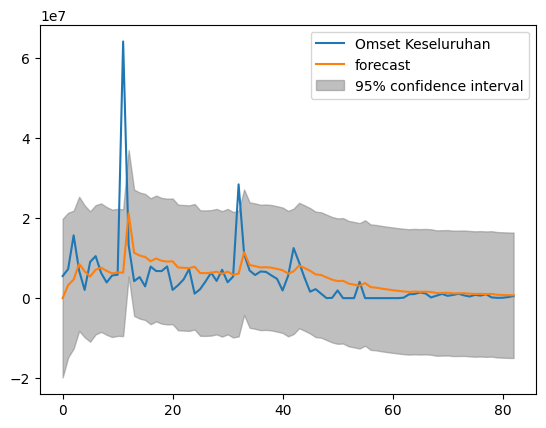

In [696]:
fig, ax = plt.subplots()
ax = dtrain1.plot(ax=ax)
plot_predict(result,ax=ax)
plt.show()

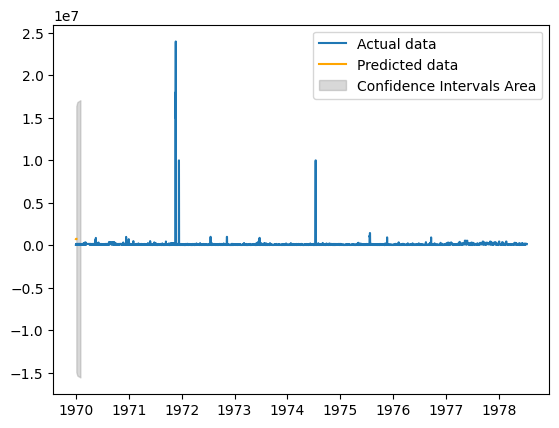

In [697]:
plt.plot(dataforcast1['Omset Keseluruhan'], label='Actual data')
plt.plot(predicted_df, color='orange', label='Predicted data')
plt.fill_between(date_index, confint_df[0], confint_df[1],color='grey',alpha=.3, label='Confidence Intervals Area')

plt.legend()
plt.show()

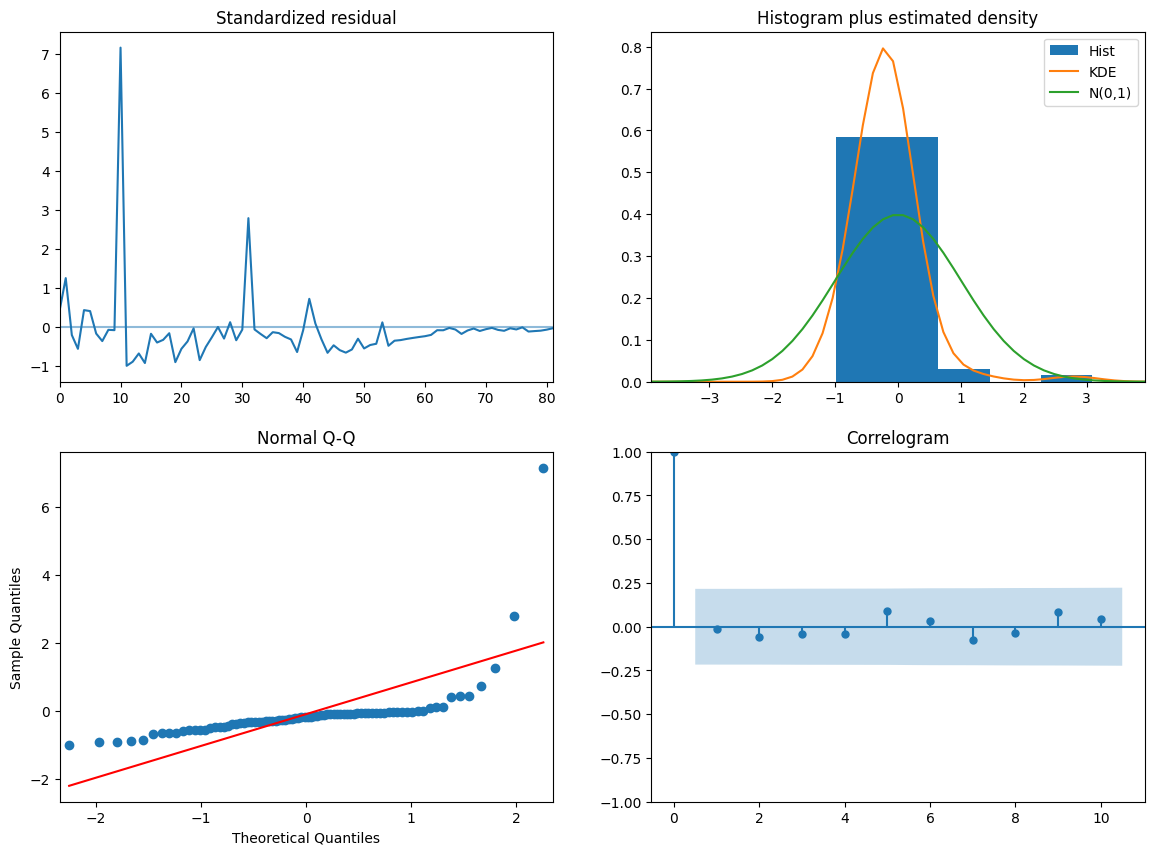

In [698]:
sarima_model.plot_diagnostics(figsize=(14,10))
plt.show()

#MAPE

In [699]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [711]:
smape=calcsmape(dtest1,prediction)
smape

0.0302681784435522